In [ ]:
# This reads in SDSS spectra, clips them to restrict them to the wavelength range of 
# interest, and calculates the S/N given the unnormalized flux and noise from SDSS

# Created 2021 July 18 by E.S.

In [1]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# path stems

stem = "/Users/bandari/Documents/git.repos/rrlyrae_metallicity/rrlyrae_metallicity/" + \
    "sdss_spectra_cosmic_ray_removal/03a_post_2nd_mask_pre_any_normalization/"

In [3]:
# read in each file, clip, find S/N

file_names = glob.glob(stem + "*dat")

In [24]:
# match S/N with the right file in the table containing Robospect data

#df_s_to_n = pd.DataFrame(columns=["file_name","s_to_n"])
dict_s_to_n = {"file_name":[], "s_to_n":[]}

for spec_num in range(0,len(file_names)):
    this_spectrum = pd.read_csv(file_names[spec_num], names=["wavel","flux","noise"], delim_whitespace=True)
    this_spectrum["s_to_n_spec"] = np.divide(this_spectrum["flux"],this_spectrum["noise"])

    # mask out line regions
    caii_K_line = np.logical_and(this_spectrum["wavel"] >= 3933.66-30,this_spectrum["wavel"] <= 3933.66+30)
    h_eps_line = np.logical_and(this_spectrum["wavel"] >= 3970.075-30,this_spectrum["wavel"] <= 3970.075+30)
    h_del_line = np.logical_and(this_spectrum["wavel"] >= 4101.71-30,this_spectrum["wavel"] <= 4101.71+30)
    h_gam_line = np.logical_and(this_spectrum["wavel"] >= 4340.472-30,this_spectrum["wavel"] <= 4340.472+30)
    h_beta_line = np.logical_and(this_spectrum["wavel"] >= 4861.29-30,this_spectrum["wavel"] <= 4861.29+30)
    # sum across the arrays
    sum_array = np.sum([np.array(caii_K_line),
                        np.array(h_eps_line),
                        np.array(h_del_line),
                        np.array(h_gam_line),
                        np.array(h_beta_line)],axis=0)
    # convert to boolean column (True = 'there is an absorption line here')
    line_bool_array = np.array(sum_array, dtype=bool)
    this_spectrum["line_regions"] = line_bool_array
    idx_outside_lines = this_spectrum.index[this_spectrum["line_regions"] == False].tolist()

    net_s_to_n = np.median(this_spectrum["s_to_n_spec"].loc[idx_outside_lines])
    #net_s_to_n = np.median(this_spectrum["s_to_n_spec"])

    dict_s_to_n["s_to_n"].append(net_s_to_n)
    dict_s_to_n["file_name"].append(0)
    #df_s_to_n = df_s_to_n.append({"file_name": np.nan,"s_to_n": net_s_to_n})
    
    print("Net S/N: ")
    print(net_s_to_n)

Net S/N: 
22.77377762450743
Net S/N: 
27.829107929708854
Net S/N: 
26.412775952411348
Net S/N: 
15.819825465851977
Net S/N: 
22.196450215649023
Net S/N: 
22.445698875479614
Net S/N: 
25.975978765426166
Net S/N: 
16.08374307732324
Net S/N: 
27.613386278506404
Net S/N: 
26.887263583191583
Net S/N: 
11.839876596415396
Net S/N: 
29.767526902225974
Net S/N: 
26.877246657672153
Net S/N: 
24.54527354394
Net S/N: 
27.682970673137085
Net S/N: 
14.765361393360035
Net S/N: 
28.423512782965894
Net S/N: 
25.093247198624834
Net S/N: 
22.752823170901337
Net S/N: 
19.887035377548134
Net S/N: 
15.904174329981954
Net S/N: 
10.22168223309474
Net S/N: 
27.053502760473947
Net S/N: 
14.20343656048366
Net S/N: 
24.826088535359744
Net S/N: 
25.258905044156066
Net S/N: 
16.320735564114358
Net S/N: 
14.616403997241356
Net S/N: 
21.694100273680448
Net S/N: 
13.038099669568274
Net S/N: 
13.505331002757535
Net S/N: 
22.192711265238536
Net S/N: 
13.026452275123159
Net S/N: 
14.191687894229588
Net S/N: 
25.731818611

Net S/N: 
16.92655170501395
Net S/N: 
24.60864256430344
Net S/N: 
11.790066084581765
Net S/N: 
21.887495345043106
Net S/N: 
21.813394457671464
Net S/N: 
19.654416756232173
Net S/N: 
14.662900297590298
Net S/N: 
21.21588619880986
Net S/N: 
13.341592655015333
Net S/N: 
18.632133376788772
Net S/N: 
27.48525421994428
Net S/N: 
21.624694450378236
Net S/N: 
17.841053937347514
Net S/N: 
17.272304590209753
Net S/N: 
12.541749690011944
Net S/N: 
12.357317567121147
Net S/N: 
11.287949679411842
Net S/N: 
28.46388586922787
Net S/N: 
11.339437174633616
Net S/N: 
19.81355183691829
Net S/N: 
12.970581731943199
Net S/N: 
24.487731641442384
Net S/N: 
14.743101178772696
Net S/N: 
21.25533426457266
Net S/N: 
28.51446643686311
Net S/N: 
19.024734832618428
Net S/N: 
22.725535818334116
Net S/N: 
14.405539699985926
Net S/N: 
21.80368642674778
Net S/N: 
30.79002985077448
Net S/N: 
13.368583103201038
Net S/N: 
19.092647398033673
Net S/N: 
18.990345961253936
Net S/N: 
26.35983871517598
Net S/N: 
24.881447845310

Net S/N: 
27.299352765059794
Net S/N: 
18.597791964269952
Net S/N: 
25.79181028389877
Net S/N: 
21.621925376110607
Net S/N: 
16.025017174856053
Net S/N: 
24.181936779093952
Net S/N: 
31.061909358648805
Net S/N: 
21.840548057539063
Net S/N: 
25.14701896068926
Net S/N: 
25.747376639957324
Net S/N: 
25.014183685861674
Net S/N: 
25.37538214866698
Net S/N: 
26.354766514716637
Net S/N: 
15.783568066271346
Net S/N: 
28.290288408140263
Net S/N: 
17.16796943067026
Net S/N: 
27.043917752932995
Net S/N: 
14.316597381032155
Net S/N: 
12.410246704077338
Net S/N: 
12.780095827150394
Net S/N: 
11.312870099692677
Net S/N: 
12.91241154376544
Net S/N: 
15.390810800392657
Net S/N: 
17.89737995225038
Net S/N: 
12.162689525876429
Net S/N: 
15.666471860416149
Net S/N: 
16.701964743804186
Net S/N: 
11.417698726738355
Net S/N: 
18.1089521954358
Net S/N: 
20.435522284971732
Net S/N: 
13.318036794759529
Net S/N: 
16.426649555581704
Net S/N: 
14.248159611749625
Net S/N: 
20.73510007800531
Net S/N: 
26.9813294420

Net S/N: 
11.133878559312869
Net S/N: 
17.75001709432633
Net S/N: 
17.373906154091046
Net S/N: 
18.242819432824867
Net S/N: 
11.756855218470694
Net S/N: 
12.362119613431318
Net S/N: 
14.502844778804658
Net S/N: 
12.137800824104074
Net S/N: 
20.872011676447688
Net S/N: 
23.4682596868495
Net S/N: 
28.59009999193671
Net S/N: 
21.529923672474787
Net S/N: 
12.900665741706574
Net S/N: 
27.394724561044164
Net S/N: 
21.46838079573949
Net S/N: 
11.3605014019688
Net S/N: 
20.179158810811685
Net S/N: 
11.87903402176197
Net S/N: 
18.346424525134257
Net S/N: 
11.22314521210618
Net S/N: 
16.985197600384126
Net S/N: 
13.330235479072924
Net S/N: 
20.648700025465516
Net S/N: 
26.586701648537378
Net S/N: 
25.61942962924021
Net S/N: 
23.943726752554007
Net S/N: 
13.19483383376967
Net S/N: 
13.2902267920095
Net S/N: 
18.294800364210325
Net S/N: 
31.2198322807918
Net S/N: 
19.556790617007163
Net S/N: 
20.711484376561465
Net S/N: 
21.476332859611936
Net S/N: 
17.43604997637297
Net S/N: 
19.66555785284394
Ne

Net S/N: 
24.110263204245577
Net S/N: 
14.426221235527692
Net S/N: 
21.191586137378494
Net S/N: 
13.501406248663157
Net S/N: 
17.043016749463497
Net S/N: 
21.081940921162193
Net S/N: 
19.016596975036002
Net S/N: 
20.488168444653944
Net S/N: 
20.022991073061426
Net S/N: 
18.471239711475572
Net S/N: 
12.460682056084625
Net S/N: 
21.518113404163184
Net S/N: 
25.892857843675124
Net S/N: 
28.201418421012043
Net S/N: 
13.265056831146115
Net S/N: 
25.313623056115127
Net S/N: 
16.269550447545967
Net S/N: 
12.47376174387432
Net S/N: 
14.533741572868772
Net S/N: 
20.540718742808252
Net S/N: 
23.520892058310128
Net S/N: 
12.0355504012844
Net S/N: 
22.66458899388468
Net S/N: 
20.668123782639775
Net S/N: 
25.403909329498518
Net S/N: 
13.192474840829647
Net S/N: 
13.022931335771132
Net S/N: 
11.878218746810873
Net S/N: 
20.198546092010808
Net S/N: 
27.436070510141395
Net S/N: 
14.959207026490839
Net S/N: 
26.277737294610525
Net S/N: 
17.851359873402586
Net S/N: 
22.841581526423283
Net S/N: 
22.51701

Net S/N: 
29.480193686021273
Net S/N: 
25.411946477517134
Net S/N: 
14.720812647897528
Net S/N: 
28.210875320080127
Net S/N: 
15.898846969404632
Net S/N: 
15.682595974326395
Net S/N: 
23.673213582510726
Net S/N: 
26.700392991560037
Net S/N: 
23.6106111716959
Net S/N: 
20.964817991827307
Net S/N: 
27.78991846170912
Net S/N: 
24.25511691513829
Net S/N: 
17.084564212037833
Net S/N: 
19.34794100396985
Net S/N: 
18.639261180918297
Net S/N: 
27.588840244859014
Net S/N: 
12.926649766798416
Net S/N: 
18.39850573379897
Net S/N: 
18.007363730000915
Net S/N: 
20.418486377309513
Net S/N: 
15.080030727120807
Net S/N: 
19.34458613247846
Net S/N: 
24.413410203504434
Net S/N: 
23.335790051883276
Net S/N: 
25.125154669769017
Net S/N: 
17.743463828919893
Net S/N: 
13.025270814628207
Net S/N: 
23.48148446615078
Net S/N: 
12.828710611081371
Net S/N: 
22.475950086864355
Net S/N: 
23.525057137091785
Net S/N: 
13.391500581431174
Net S/N: 
29.88640320179482
Net S/N: 
25.54780888794881
Net S/N: 
23.31883272929

Net S/N: 
18.779724715415107
Net S/N: 
25.427317372056365
Net S/N: 
26.370739176935334
Net S/N: 
29.23319831475493
Net S/N: 
13.198431122703825
Net S/N: 
21.900564867814744
Net S/N: 
15.177648681231155
Net S/N: 
23.72535390026647
Net S/N: 
15.865274169284422
Net S/N: 
12.942963002261653
Net S/N: 
19.933464009226775
Net S/N: 
17.306138470716625
Net S/N: 
25.347962963590135
Net S/N: 
13.363981492747339
Net S/N: 
12.997929209831604
Net S/N: 
17.607422441077155
Net S/N: 
26.35636880385396
Net S/N: 
14.408841892071411
Net S/N: 
27.168253471388276
Net S/N: 
22.298115363230938
Net S/N: 
16.51729288454157
Net S/N: 
28.465236214645373
Net S/N: 
23.225028794408765
Net S/N: 
23.188437684880405
Net S/N: 
28.74404033274925
Net S/N: 
27.88679564265246
Net S/N: 
27.702282884213922
Net S/N: 
25.04064248408273
Net S/N: 
26.22760055936289
Net S/N: 
30.458431724020066
Net S/N: 
17.38976231696789
Net S/N: 
23.497401988899682
Net S/N: 
15.202523552295599
Net S/N: 
20.132350941030808
Net S/N: 
22.9816060458

Net S/N: 
19.589677879850086
Net S/N: 
13.171124613812538
Net S/N: 
28.077937885837258
Net S/N: 
20.32283338295661
Net S/N: 
18.585301586525325
Net S/N: 
12.649498937318675
Net S/N: 
17.660496785377855
Net S/N: 
22.528991225031312
Net S/N: 
24.801838526200207
Net S/N: 
13.193822587090722
Net S/N: 
27.32461755527791
Net S/N: 
14.51075588764345
Net S/N: 
14.49629930345964
Net S/N: 
17.143945777040244
Net S/N: 
10.872239205530326
Net S/N: 
15.211778924540297
Net S/N: 
14.684459867496905
Net S/N: 
17.82758306698879
Net S/N: 
26.733786714059654
Net S/N: 
27.468880842091856
Net S/N: 
21.25524555716924
Net S/N: 
16.631542174300463
Net S/N: 
23.508929293396804
Net S/N: 
17.02948150274246
Net S/N: 
24.82211204530411
Net S/N: 
25.096296261290895
Net S/N: 
12.294160246934208
Net S/N: 
18.743296062979404
Net S/N: 
28.49621637965257
Net S/N: 
28.179081225159436
Net S/N: 
30.919535838219876
Net S/N: 
25.67739132522845
Net S/N: 
18.243210969521904
Net S/N: 
12.492786594089157
Net S/N: 
27.85796388446

Net S/N: 
24.97087711384808
Net S/N: 
21.929638657897744
Net S/N: 
13.279838466669803
Net S/N: 
24.276211752596442
Net S/N: 
19.37631529403034
Net S/N: 
21.359907159209335
Net S/N: 
18.233829648202516
Net S/N: 
16.39251013627177
Net S/N: 
12.417292422191693
Net S/N: 
13.088234656606339
Net S/N: 
29.343846898126834
Net S/N: 
19.57357421778505
Net S/N: 
18.2926304542611
Net S/N: 
15.466472134996781
Net S/N: 
30.25124087191847
Net S/N: 
26.244677661273506
Net S/N: 
21.588866261744144
Net S/N: 
25.82885793449093
Net S/N: 
29.502949073254545
Net S/N: 
12.42258789408686
Net S/N: 
11.088739657981238
Net S/N: 
23.23023176910913
Net S/N: 
17.247278327488463
Net S/N: 
10.98179836234291
Net S/N: 
13.07705111828325
Net S/N: 
17.896207661549184
Net S/N: 
20.67486612160406
Net S/N: 
27.19113899245906
Net S/N: 
22.2470025064842
Net S/N: 
27.438753121749386
Net S/N: 
14.449381684710737
Net S/N: 
14.820604874436176
Net S/N: 
15.369067530104807
Net S/N: 
18.59250267761246
Net S/N: 
17.556531503439
Net S

Net S/N: 
11.441845385772792
Net S/N: 
24.091180439300842
Net S/N: 
27.558163375178413
Net S/N: 
25.400151129227492
Net S/N: 
17.219067796399656
Net S/N: 
13.500365165992303
Net S/N: 
29.06242584564722
Net S/N: 
27.564011040469154
Net S/N: 
14.104804443571524
Net S/N: 
13.901633450267184
Net S/N: 
12.178955895562895
Net S/N: 
11.387525258678224
Net S/N: 
16.67395489266157
Net S/N: 
22.436654891134296
Net S/N: 
12.275606698110327
Net S/N: 
18.25700847095503
Net S/N: 
29.734678847038534
Net S/N: 
15.995069487290317
Net S/N: 
27.132551247421432
Net S/N: 
28.12687230442921
Net S/N: 
27.128630599018845
Net S/N: 
18.882871196702453
Net S/N: 
17.44060216284762
Net S/N: 
11.86823793866332
Net S/N: 
27.827034523478275
Net S/N: 
19.876453114274298
Net S/N: 
22.02915238288144
Net S/N: 
13.37900560806678
Net S/N: 
26.08672050161035
Net S/N: 
30.102809363952666
Net S/N: 
17.675610640508275
Net S/N: 
21.863425328202574
Net S/N: 
29.95193334083809
Net S/N: 
22.67998818765932
Net S/N: 
27.433447775193

Net S/N: 
22.426593241746467
Net S/N: 
20.34864022905341
Net S/N: 
25.190748092326963
Net S/N: 
14.715009305421027
Net S/N: 
16.01958863230537
Net S/N: 
17.56587448226891
Net S/N: 
15.898875621934186
Net S/N: 
27.365778091787057
Net S/N: 
27.777831979754005
Net S/N: 
16.715508128645503
Net S/N: 
26.78736842981943
Net S/N: 
26.46083244397683
Net S/N: 
21.55279069698559
Net S/N: 
23.322055539121113
Net S/N: 
12.564310188198561
Net S/N: 
24.36627681273058
Net S/N: 
30.18966013402261
Net S/N: 
23.113183624143147
Net S/N: 
14.757782257005442
Net S/N: 
16.286186648813306
Net S/N: 
13.024892064877761
Net S/N: 
13.823822084424616
Net S/N: 
24.6393102587269
Net S/N: 
12.476465998997654
Net S/N: 
20.833570079608307
Net S/N: 
13.855992553704127
Net S/N: 
16.191261292579693
Net S/N: 
16.271913151124444
Net S/N: 
26.857878397344386
Net S/N: 
25.565282893794546
Net S/N: 
21.805143289572605
Net S/N: 
18.30516683688462
Net S/N: 
17.32611939188157
Net S/N: 
23.255456592375197
Net S/N: 
12.9250404047297

Net S/N: 
20.421655729333608
Net S/N: 
18.667655813611834
Net S/N: 
12.017435609394251
Net S/N: 
17.20549874077841
Net S/N: 
26.413337806797575
Net S/N: 
13.257158993665495
Net S/N: 
17.65245721222666
Net S/N: 
22.273971483824205
Net S/N: 
15.690728913239827
Net S/N: 
17.36855288341735
Net S/N: 
14.411181136941938
Net S/N: 
14.48319258324551
Net S/N: 
27.634731774244692
Net S/N: 
24.540062955374665
Net S/N: 
16.27323600557992
Net S/N: 
22.511744248038916
Net S/N: 
26.238711785944545
Net S/N: 
25.77329371147098
Net S/N: 
24.21928853176545
Net S/N: 
22.412801607849218
Net S/N: 
15.317127016408051
Net S/N: 
12.670954669234781
Net S/N: 
23.91339176350734
Net S/N: 
21.302665246429882
Net S/N: 
29.770204362526552
Net S/N: 
25.545538563511393
Net S/N: 
23.97756665139204
Net S/N: 
27.57522978101802
Net S/N: 
24.42863452747746
Net S/N: 
20.146290765038223
Net S/N: 
17.60446550771281
Net S/N: 
11.445021033599382
Net S/N: 
27.02199167389414
Net S/N: 
25.613931627306215
Net S/N: 
24.95920219004082

Net S/N: 
27.95558237199107
Net S/N: 
28.592625451401407
Net S/N: 
24.80597370019317
Net S/N: 
11.352032664585318
Net S/N: 
18.68768245392213
Net S/N: 
29.47875306309725
Net S/N: 
16.811466185703143
Net S/N: 
25.25781908497831
Net S/N: 
20.298521290788024
Net S/N: 
18.299765555190397
Net S/N: 
25.506505182364887
Net S/N: 
20.662210200887888
Net S/N: 
24.91647961315236
Net S/N: 
19.509459227512707
Net S/N: 
26.08139675888714
Net S/N: 
11.039736326825263
Net S/N: 
12.539325274072247
Net S/N: 
26.364828229587914
Net S/N: 
18.810995457466653
Net S/N: 
21.496951899688582
Net S/N: 
20.496683212122566
Net S/N: 
21.827772623070405
Net S/N: 
23.183555663931884
Net S/N: 
22.93855100423242
Net S/N: 
16.797317200034882
Net S/N: 
14.957503023929728
Net S/N: 
27.083939998854735
Net S/N: 
27.35393672610686
Net S/N: 
13.730513777446111
Net S/N: 
30.122788187181996
Net S/N: 
27.677010457647427
Net S/N: 
22.655513527414776
Net S/N: 
15.914585575153183
Net S/N: 
22.412713298296104
Net S/N: 
27.7547547345

Net S/N: 
28.91293114926478
Net S/N: 
25.171466924487156
Net S/N: 
13.705998446824983
Net S/N: 
14.867518466361314
Net S/N: 
29.765947716724398
Net S/N: 
15.915827980036973
Net S/N: 
11.60942869844802
Net S/N: 
28.71693747950883
Net S/N: 
20.35838383827759
Net S/N: 
25.12668101045242
Net S/N: 
15.703486661162334
Net S/N: 
15.546958619343876
Net S/N: 
13.4980821265594
Net S/N: 
14.208059808176934
Net S/N: 
27.942793068405926
Net S/N: 
27.446528171718064
Net S/N: 
20.475236543817893
Net S/N: 
18.858340982391425
Net S/N: 
19.77249907891005
Net S/N: 
12.256021326179948
Net S/N: 
22.741366385892647
Net S/N: 
19.222032154419345
Net S/N: 
14.082107198184698
Net S/N: 
21.24888780110495
Net S/N: 
15.031325200439806
Net S/N: 
23.35121316339868
Net S/N: 
20.873870110685544
Net S/N: 
14.231880754848397
Net S/N: 
20.57413245393019
Net S/N: 
17.893924116418354
Net S/N: 
23.032658141384026
Net S/N: 
19.132423268274117
Net S/N: 
18.739474015356144
Net S/N: 
30.33723187542529
Net S/N: 
25.4240848555090

In [25]:
df_s_to_n = pd.DataFrame.from_dict(dict_s_to_n)

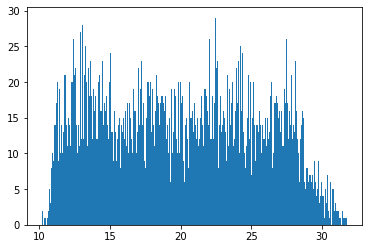

In [30]:
plt.hist(df_s_to_n["s_to_n"], bins=300)
plt.show()

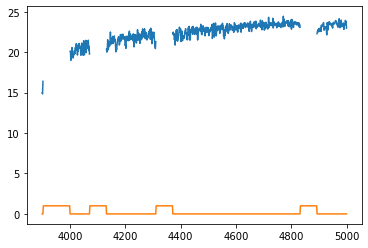

In [10]:
# write out

plt.plot(this_spectrum["wavel"],this_spectrum["s_to_n_spec"])
plt.plot(this_spectrum["wavel"],this_spectrum["line_regions"])
plt.show()

/Users/bandari/anaconda3/envs/rrl_env/lib/python3.6/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)
/Users/bandari/anaconda3/envs/rrl_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:87: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


TypeError: '>=' not supported between instances of 'float' and 'list'

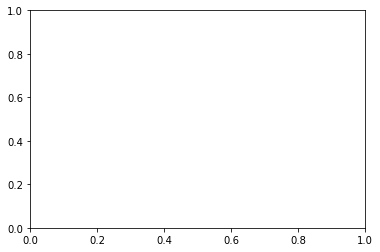

In [17]:
plt.hist(array_net_s_to_n)
plt.show()